For this project, I am going to be examining a dataset of information about various vehicles. I will start by taking a look at the dataset to see if there is anything that needs to be changed or added before visualization.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


vehicles_df = pd.read_csv('vehicles_us.csv')

vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [24]:
duplicates = vehicles_df.duplicated()
print(duplicates.sum())


0


There were no duplicates to remove.

In [25]:
print(vehicles_df.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


There are quite a few missing values in this dataset. I will get rid of those missing values to make it easier to read.

In [26]:
vehicles_df.dropna()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,1.0,2018-09-17,38
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24
16,14990,2010.0,ram 1500,excellent,8.0,gas,130725.0,automatic,pickup,red,1.0,2018-12-30,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51494,7999,2009.0,chevrolet equinox,excellent,6.0,gas,95021.0,automatic,SUV,silver,1.0,2019-01-03,8
51500,6995,2012.0,buick enclave,excellent,6.0,gas,157000.0,automatic,SUV,white,1.0,2018-08-04,17
51509,5980,2010.0,subaru impreza,excellent,4.0,gas,121778.0,manual,hatchback,white,1.0,2019-01-10,8
51513,17999,2014.0,ram 1500,like new,8.0,gas,154000.0,automatic,pickup,white,1.0,2018-06-21,11


Final step before beginning visualization will be to remove any outliers from the dataset that may skew the data.

In [27]:
numeric_cols = vehicles_df.select_dtypes(include=['int64', 'float64']).columns

Q1 = vehicles_df[numeric_cols].quantile(0.25)
Q3 = vehicles_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Create a boolean DataFrame indicating non-outliers
non_outliers = ((vehicles_df[numeric_cols] >= lower_bound) & (vehicles_df[numeric_cols] <= upper_bound))

# Keep only rows where all values are non-outliers
vehicles_processed = vehicles_df[non_outliers.all(axis=1)]

print(vehicles_processed)


       price  model_year                        model  condition  cylinders  \
0       9400      2011.0                       bmw x5       good        6.0   
5      14990      2014.0                 chrysler 300  excellent        6.0   
7      15990      2013.0                  honda pilot  excellent        6.0   
8      11500      2012.0                  kia sorento  excellent        4.0   
10     19500      2011.0     chevrolet silverado 1500  excellent        8.0   
...      ...         ...                          ...        ...        ...   
51500   6995      2012.0                buick enclave  excellent        6.0   
51506  28900      2017.0  ford f150 supercrew cab xlt       good        6.0   
51509   5980      2010.0               subaru impreza  excellent        4.0   
51513  17999      2014.0                     ram 1500   like new        8.0   
51515  12000      2005.0   chevrolet silverado 2500hd       good        8.0   

         fuel  odometer transmission       type pai

Now that I have done some initial processing on the dataset, I will begin to work on visualization.

First I will create a scatterplot comparing the price of the vehicle to the year it was made.

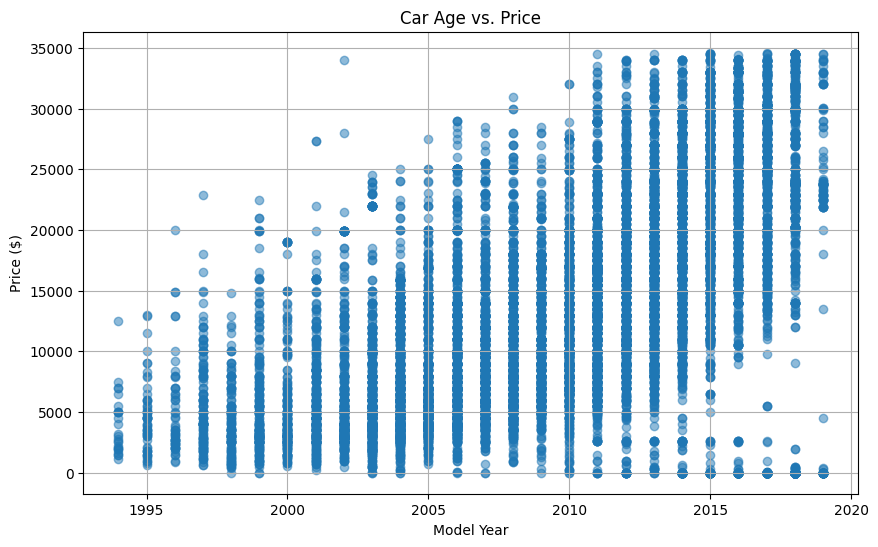

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_processed['model_year'], vehicles_processed['price'], alpha=0.5)
plt.title('Car Age vs. Price')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

It looks like the average price of a vehicle made past 2015 will have an overall higher value that cars made in previous years.

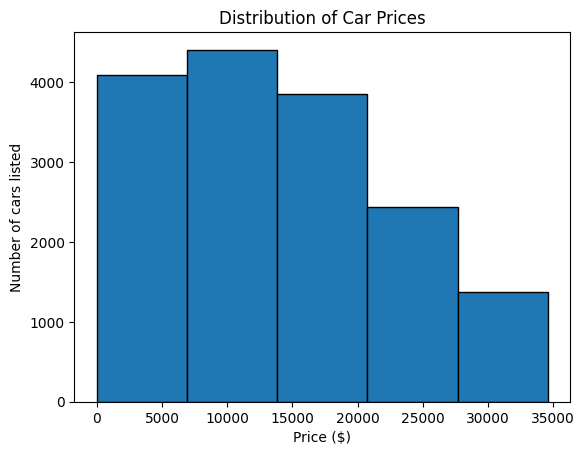

In [29]:
# Create histogram
plt.hist(vehicles_processed['price'], bins=5, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of cars listed')

# Show plot
plt.show()

It looks like the majority of cars are listed for less than around $14000.